# ECG Heartbeat Categorization - Feature Engineering
Feature Creation and Feature Engineering have a huge impact on model performance. Features can be changed or new features can be created from existing features.

# Imports

In [28]:
# imports
import numpy as np
from numpy import where
from collections import Counter
import pandas as pd
#!pip install pandas-profiling
#import pandas_profiling
#from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#!pip install imbalanced-learn
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
%matplotlib inline

0.7.0


## Load Data

In [63]:
# Sampled dataset
data_ecg = pd.read_csv('data_ecg.csv')
data_ecg.T

,0,1,2,3,4,5,6,7,8,9,...,87543,87544,87545,87546,87547,87548,87549,87550,87551,87552
0,0.960114,1.000000,0.925414,0.967136,0.927461,0.423611,0.716814,0.874214,1.000000,0.985507,...,0.621951,0.799242,0.757235,0.717325,1.000000,0.807018,0.718333,0.906122,0.858228,0.901506
1,0.863248,0.659459,0.665746,1.000000,1.000000,0.791667,0.539823,0.849057,0.996086,0.880435,...,0.521341,0.515152,0.663987,0.627660,0.405594,0.494737,0.605000,0.624490,0.645570,0.845886
2,0.461538,0.186486,0.541436,0.830986,0.626943,1.000000,0.283186,0.480084,0.694716,0.518116,...,0.463415,0.545455,0.561093,0.534954,0.440559,0.536842,0.486667,0.595918,0.845570,0.800695
3,0.196581,0.070270,0.276243,0.586854,0.193437,0.256944,0.129794,0.058700,0.336595,0.213768,...,0.457317,0.553030,0.453376,0.427052,0.405594,0.529825,0.361667,0.575510,0.248101,0.748552
4,0.094017,0.070270,0.196133,0.356808,0.094991,0.000000,0.064897,0.090147,0.238748,0.126812,...,0.417683,0.526515,0.324759,0.322188,0.405594,0.491228,0.231667,0.530612,0.167089,0.687138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
184,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
185,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
186,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Split features and targets and make copy of df

In [64]:
#Split features and targets and make copy of df
X = data_ecg.drop('label',axis=1).copy() 
y = data_ecg['label'].copy()

In [65]:
#Check the shape of the features and targets
print(X.shape)

(87553, 187)


In [55]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
0,87553.0,0.890359,0.240910,0.0,0.921922,0.991342,1.000000,1.0
1,87553.0,0.758158,0.221814,0.0,0.682482,0.826007,0.910506,1.0
2,87553.0,0.423969,0.227305,0.0,0.250965,0.429467,0.578767,1.0
3,87553.0,0.219104,0.206880,0.0,0.048458,0.165992,0.341727,1.0
4,87553.0,0.201127,0.177058,0.0,0.082329,0.147870,0.258993,1.0
...,...,...,...,...,...,...,...,...
182,87553.0,0.003681,0.037193,0.0,0.000000,0.000000,0.000000,1.0
183,87553.0,0.003471,0.036255,0.0,0.000000,0.000000,0.000000,1.0
184,87553.0,0.003221,0.034790,0.0,0.000000,0.000000,0.000000,1.0
185,87553.0,0.002945,0.032865,0.0,0.000000,0.000000,0.000000,1.0


In [56]:
print(y.shape)

(87553,)


In [57]:
y.describe().T

count    87553.000000
mean         0.473382
std          1.143190
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: label, dtype: float64

## There are Five Categories or Labels

* 0: N - Normal
* 1: S - Atrial premature
* 2: V - Premature ventricular contraction
* 3: F - Fusion of ventricular and normal
* 4: Q - Paced Unclassifiable 

## Label Mapping

In [66]:
# For class label mapping

class_label = {
    0: 'N - Normal',
    1: 'S - Atrial premature',
    2: 'V - Premature ventricular contraction',
    3: 'F - Fusion of ventricular and normal',
    4: 'Q - Paced Unclassifiable'
}

In [67]:
#Check for imbalanced data
y.value_counts()

0.0    72470
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

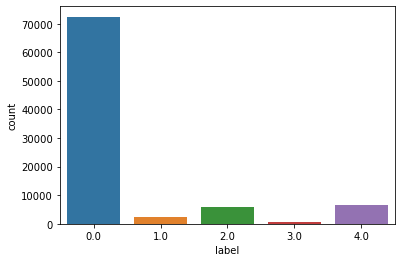

In [68]:
#!pip install seaborn
import seaborn as sns

#Plot the targets distribution
sns.countplot(x='label', data=data_ecg)

## Scatter plot of labels

In [11]:
X = np.array(X)
X.shape

(87553, 187)

In [12]:
from collections import Counter
counter = Counter(y)
print(counter)

Counter({0.0: 72470, 4.0: 6431, 2.0: 5788, 1.0: 2223, 3.0: 641})


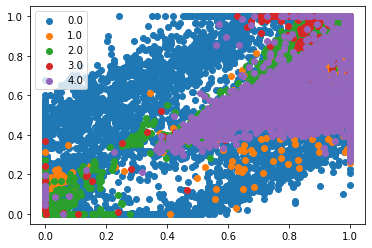

In [13]:
from numpy import where
from matplotlib import pyplot

for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

## Dealing with Imbalanced Data
#### From viewing a previous plot and the value counts we can see that we have an imblanced dataset

Class=0, n=72470 (82.773%)
Class=1, n=2223 (2.539%)
Class=2, n=5788 (6.611%)
Class=3, n=641 (0.732%)
Class=4, n=6431 (7.345%)


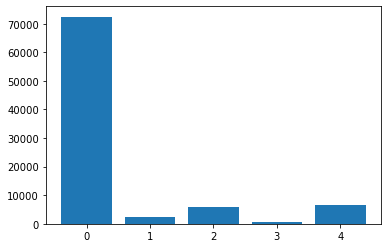

In [69]:
#from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# label encode the target variable
y = LabelEncoder().fit_transform(y)

# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

## Random Under Sampling

Counter({0: 7000, 4: 6431, 2: 5788, 1: 2223, 3: 641})
Class=0, n=7000 (31.699%)
Class=1, n=2223 (10.067%)
Class=2, n=5788 (26.210%)
Class=3, n=641 (2.903%)
Class=4, n=6431 (29.122%)


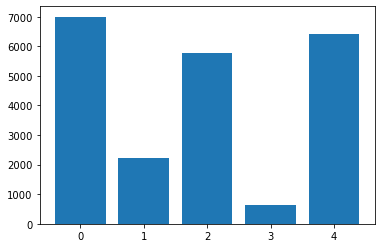

In [70]:
from imblearn.under_sampling import RandomUnderSampler

# label encode the target variable
y = LabelEncoder().fit_transform(y)

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy= {0:7000})

# transform the dataset
X, y = undersample.fit_resample(X, y)

# summarize class distribution
print(Counter(y))



# summarize distribution

counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

### Using the Default SMOTE Strategy to oversample classes to the number of examples in the majority class

Class=0, n=7000 (20.000%)
Class=1, n=7000 (20.000%)
Class=2, n=7000 (20.000%)
Class=3, n=7000 (20.000%)
Class=4, n=7000 (20.000%)


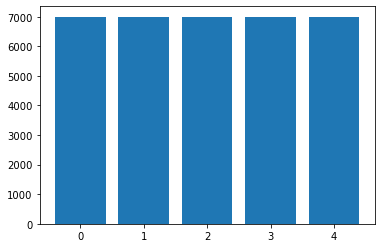

In [71]:
#Default SMOTE Strategy to oversample all classes to the number of examples in the majority class

from imblearn.over_sampling import SMOTE

# label encode the target variable
y = LabelEncoder().fit_transform(y)

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

## Train -Test Split and PCA

#### Scaling / Normalizing / Centering
Note: Dataset is already scaled between 0 and 1 - may want to experiment here

Note: Fitting must be done on the training data to avoid 'leaking' from test data.

In [72]:
# Using 90% for training and 10% for testing
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y,train_size=0.9,random_state=0)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [73]:
X_train.shape

(31500, 187)

In [74]:
X_test.shape

(3500, 187)

## PCA
The code below has .95 for the number of components parameter. Scikit-learn will choose the minimum number of principal components required to retain 95% of the variance.

In [75]:
from sklearn.decomposition import PCA

#Make an instance of the Model
pca = PCA(.95)

In [76]:
#Fit PCA on training set
pca.fit(X_train)

PCA(n_components=0.95)

### Display the number of componenets chosen from PCA

In [77]:
pca.n_components_

29

### Apply the mapping (transform) to both the training set and the test set.

In [78]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [79]:
X_test.shape

(3500, 29)

In [80]:
X_train.shape

(31500, 29)